# Simple Linear Regression
### Abhiram MV - Data Science and Business Analytics
### Task - Predict the percentage of a student based on the no. of study hours.
#### Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#### Importing the Dataset 

In [2]:
path = 'http://bit.ly/w-data' #Url for the data
df = pd.read_csv(path) #reading the CSV and converting to dataframe

In [3]:
df.head() #Displaying first few rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

Dataframe contains 25 rows and 2 columns

In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There no missing values

#### Data Visualization using Seaborn 

#### Bar Plot

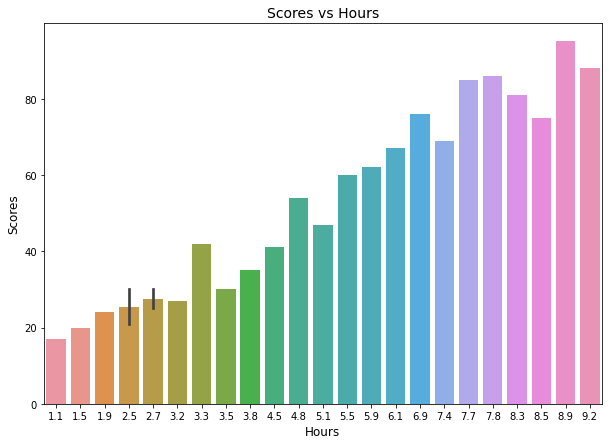

In [9]:
plt.figure(figsize=(10,7))
sns.barplot(x='Hours',y='Scores',data=df)
plt.title('Scores vs Hours',fontsize = 14 )
plt.xlabel('Hours',fontsize = 12 )
plt.ylabel('Scores',fontsize = 12 )
plt.show()

#### Scatter Plot

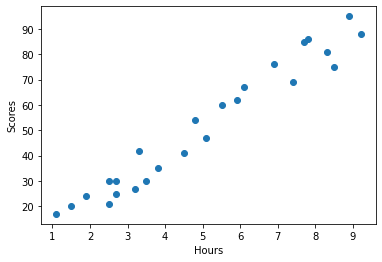

In [10]:
plt.scatter(x='Hours',y='Scores',data=df)

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

We can see a linear relationship between 

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Heatmap

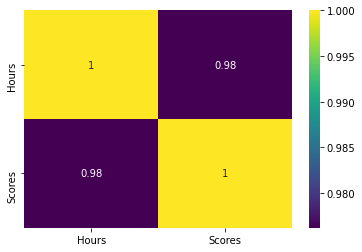

In [12]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

### Lineplot

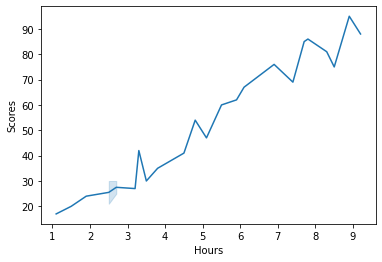

In [13]:
sns.lineplot(x='Hours',y='Scores',data=df)
plt.show()

#### Seperating out labels and features
- Label is the output class which we have to predict. It is the dependent variable
- Features are the independent variables which affect the label

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#### Model Training

In [15]:
#splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
pred = lr.predict(X_test)

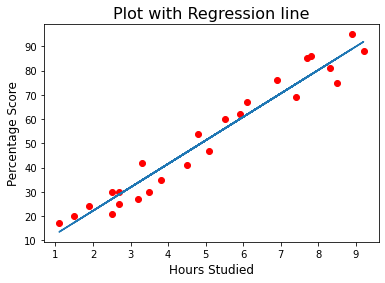

In [18]:
line = lr.coef_*X+lr.intercept_

plt.title('Plot with Regression line',size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Percentage Score', size=12)
plt.scatter(X, y,color='red')
plt.plot(X, line);
plt.show()

#### Predicting the Values

In [19]:
predDf = pd.DataFrame({"Actual Scores":y_test,"Predicted Scores":pred})
predDf

,Actual Scores,Predicted Scores
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [20]:
my_pred = round(lr.predict([[9.25]])[0],2)

In [21]:
hours = 9.25
print("No of Hours = {}".format(hours)
print("Predicted Score = {}".format(my_pred))

No of Hours = 9.25
Predicted Score = 92.39


Therefore if a student studies <b>9.25</b> hours then he is expected to score <b>92.39 %</b>

Evaluating the model using Mean Square Error. This is generally used to evaluate Linear Regression Model

In [22]:
# Calculating the accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 3.9207511902099244


In [26]:
print('Root Mean Square: ',metrics.mean_squared_error(y_test,pred))

Root Mean Square:  18.943211722315272
